# imports

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lime.lime_tabular import LimeTabularExplainer
import shap
import os
os.makedirs("images/", exist_ok=True)
import joblib
loaded_joblib = joblib.load("best_models.joblib")
loaded_joblib.keys()
plt.style.use('default')

In [105]:
# Model evaluation function
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [106]:
# Saving the train/test split data into individual variables
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test  = loaded_joblib['X_test']
y_test  = loaded_joblib['y_test']
#  Saving the models & preprocessor from POPS-Revisited
rf_reg  = loaded_joblib['RandomForestRegressor']
lin_reg  = loaded_joblib['LinearRegression']

preprocessor = loaded_joblib['preprocessor']

In [107]:
# Evaluate loaded model
evaluate_regression(rf_reg, X_train, y_train, X_test, y_test)

Training Data:	R^2= 0.92	RMSE= 471.74
Test Data:	R^2= 0.45	RMSE= 1297.96


In [108]:
shap.initjs()

In [109]:
# Create X_shap variable
X_shap = shap.sample(X_train, nsamples = 400, random_state = 321)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
4469     7.720000         0.074669   76.3986                       0.0   
4438     5.110000         0.034868  163.8210                       1.0   
366      8.050000         0.078386  256.4646                       0.0   
2219     8.760000         0.050131  128.3336                       1.0   
6080     6.590000         0.176748   82.7908                       1.0   
...           ...              ...       ...                       ...   
215      6.670000         0.150555  130.0626                       0.0   
4680    14.300000         0.034383   96.5726                       0.0   
1288    16.000000         0.041029  142.6496                       1.0   
3635    12.822634         0.113213  254.6040                       1.0   
7936     7.365000         0.042626  227.0720                       1.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
4469                     0.0               1.0                  0.0   
4438                     0.0               0.0                  0.0   
366                      0.0               0.0                  0.0   
2219                     0.0               0.0                  0.0   
6080                     0.0               0.0                  0.0   
...                      ...               ...                  ...   
215                      0.0               0.0                  0.0   
4680                     1.0               0.0                  0.0   
1288                     0.0               0.0                  0.0   
3635                     0.0               0.0                  0.0   
7936                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
4469               0.0              0.0                     0.0  ...   
4438               0.0              0.0                     0.0  ...   
366                0.0              0.0                     0.0  ...   
2219               0.0              0.0                     0.0  ...   
6080               0.0              0.0                     0.0  ...   
...                ...              ...                     ...  ...   
215                0.0              0.0                     0.0  ...   
4680               0.0              0.0                     0.0  ...   
1288               0.0              0.0                     0.0  ...   
3635               0.0              0.0                     0.0  ...   
7936               0.0              0.0                     0.0  ...   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
4469                           0.0                  0.0             0.0   
4438                           0.0                  1.0             0.0   
366                            0.0                  0.0             0.0   
2219                           1.0                  0.0             0.0   
6080                           0.0                  0.0             0.0   
...                            ...                  ...             ...   
215                            0.0                  0.0             0.0   
4680                           0.0                  0.0             0.0   
1288                           0.0                  0.0             0.0   
3635                           0.0                  0.0             0.0   
7936                           0.0                  0.0             0.0   

      Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
4469                0.0                    0.0                    0.0   
4438                0.0                    0.0                    0.0   
366                 0.0                    0.0                    0.0   
2219                0.0                    0.0                    0.0   
6080                0.0                    0.0                    0.0   
...                 ...                    ...              

In [110]:
# Create y_shap variable
y_shap = y_train.loc[X_shap.index].astype(int)
y_shap

4469    1402
4438    2120
366     5153
2219    2556
6080      83
        ... 
215      131
4680    2251
1288    1834
3635     759
7936    4074
Name: Item_Outlet_Sales, Length: 400, dtype: int32

In [111]:
# Reset index values
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
0       7.720000         0.074669   76.3986                       0.0   
1       5.110000         0.034868  163.8210                       1.0   
2       8.050000         0.078386  256.4646                       0.0   
3       8.760000         0.050131  128.3336                       1.0   
4       6.590000         0.176748   82.7908                       1.0   
..           ...              ...       ...                       ...   
395     6.670000         0.150555  130.0626                       0.0   
396    14.300000         0.034383   96.5726                       0.0   
397    16.000000         0.041029  142.6496                       1.0   
398    12.822634         0.113213  254.6040                       1.0   
399     7.365000         0.042626  227.0720                       1.0   

     Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                       0.0               1.0                  0.0   
1                       0.0               0.0                  0.0   
2                       0.0               0.0                  0.0   
3                       0.0               0.0                  0.0   
4                       0.0               0.0                  0.0   
..                      ...               ...                  ...   
395                     0.0               0.0                  0.0   
396                     1.0               0.0                  0.0   
397                     0.0               0.0                  0.0   
398                     0.0               0.0                  0.0   
399                     0.0               0.0                  0.0   

     Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
0                 0.0              0.0                     0.0  ...   
1                 0.0              0.0                     0.0  ...   
2                 0.0              0.0                     0.0  ...   
3                 0.0              0.0                     0.0  ...   
4                 0.0              0.0                     0.0  ...   
..                ...              ...                     ...  ...   
395               0.0              0.0                     0.0  ...   
396               0.0              0.0                     0.0  ...   
397               0.0              0.0                     0.0  ...   
398               0.0              0.0                     0.0  ...   
399               0.0              0.0                     0.0  ...   

     Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                             0.0                  0.0             0.0   
1                             0.0                  1.0             0.0   
2                             0.0                  0.0             0.0   
3                             1.0                  0.0             0.0   
4                             0.0                  0.0             0.0   
..                            ...                  ...             ...   
395                           0.0                  0.0             0.0   
396                           0.0                  0.0             0.0   
397                           0.0                  0.0             0.0   
398                           0.0                  0.0             0.0   
399                           0.0                  0.0             0.0   

     Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
0                  0.0                    0.0                    0.0   
1                  0.0                    0.0                    0.0   
2                  0.0                    0.0                    0.0   
3                  0.0                    0.0                    0.0   
4                  0.0                    0.0                    0.0   
..                 ...                    ...                    ...   
395                0.0                   

In [112]:
# Create model explainer
explainer = shap.Explainer(rf_reg)
explainer

In [113]:
# Getting the shap values
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [114]:
# Confirm shap values are 2 dimension
shap_values.shape

(400, 22)

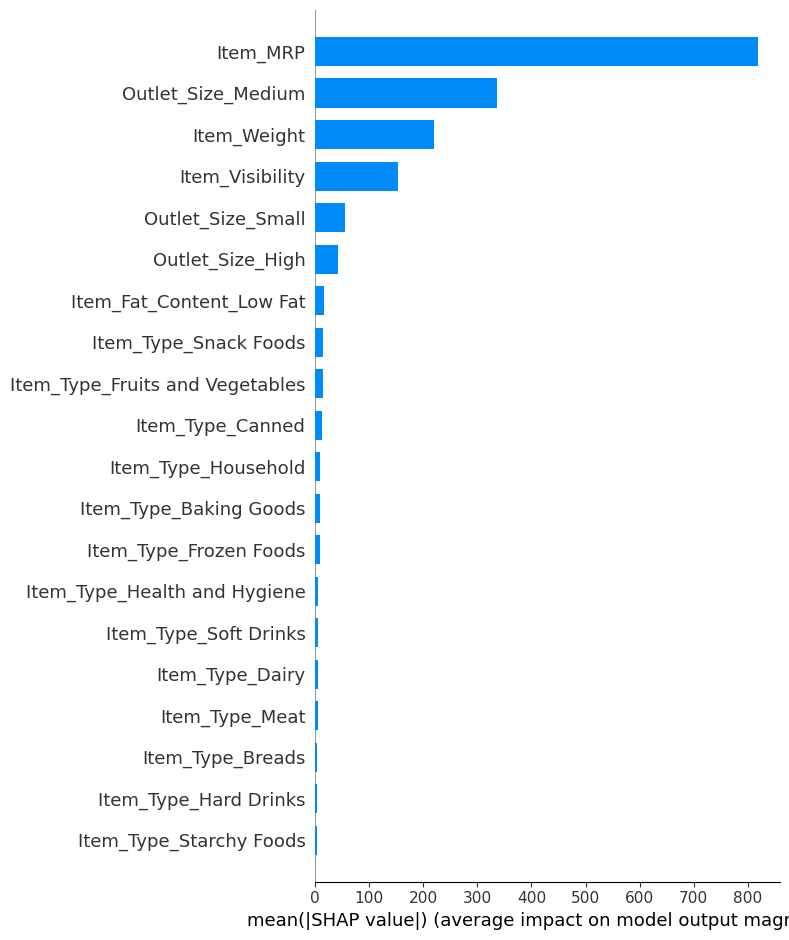

In [115]:
# Create summary plot with plot_type='bar'
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')
# Save your figure as a .png file inside your repository
fig.savefig('images/summary_plot_1.png')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


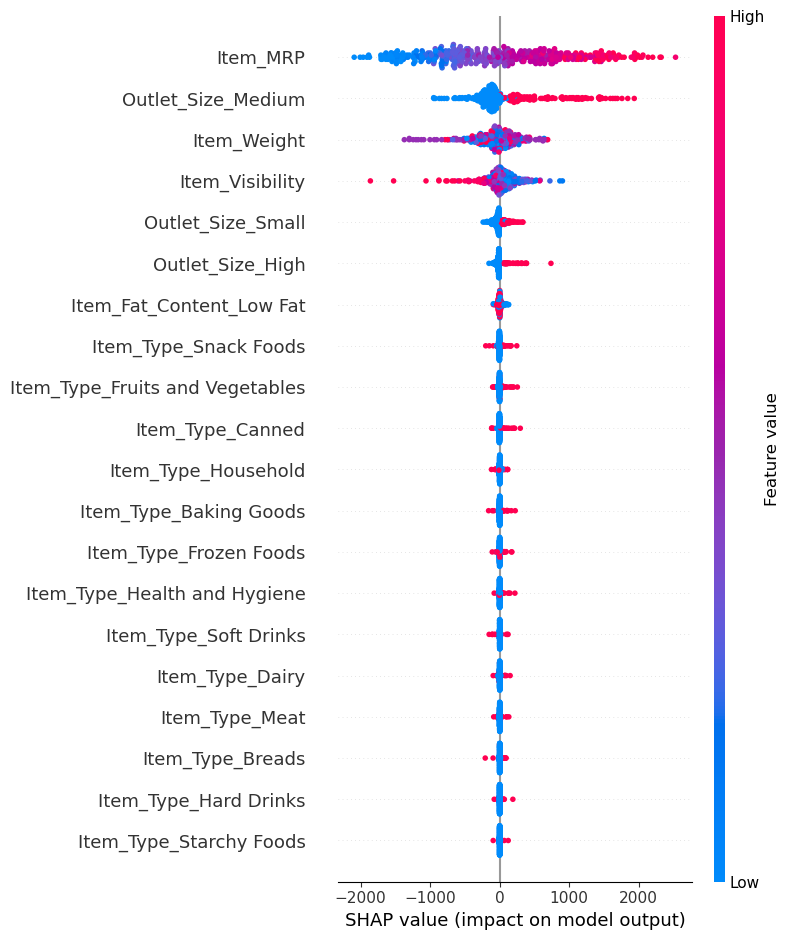

In [116]:
# Create a second summary plot with plot_type='dot'
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap)
# Save your figure as a .png file inside your repository
fig.savefig('images/summary_plot_2.png')

# interpret the top 3 most important features and how they influence your model's predictions
##     item_mrp:
###     the dot plot display a greater concentration(red dots) to the right meaning that higher values of this will increase an item's sales

##     outlet_size_medium:
###     the higher positive concentration of medium size stores(red dots) will issue a positive impact to our prediction result
##     item_weight:
###     a central cluster of our values with mixed features(purple dots) is indicative of a(n) average/typical impact on the model predictions.


# Local Explanations

In [117]:
# View global force plot
shap.force_plot(explainer.expected_value, shap_values.values, features=X_shap)


In [118]:
# Reset the index to match index
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local= y_shap.reset_index(drop=True)

In [119]:
shap_values = explainer(X_shap_local,y_shap_local)
shap_values.shape

(400, 22)

## For our selected features we will be using:

###     Item_MRP: since it has shown to have the highest impact it would be the first feature we select.
###     Item_Weight: We will be using this to further clarify why so much data is bunched together.
###     Item_Visibility: We will select item_visibility for standout performance on to see where the increases and decreases to sales are


#### Item_MRP Filter

median    139.2496
Name: Item_MRP, dtype: float64

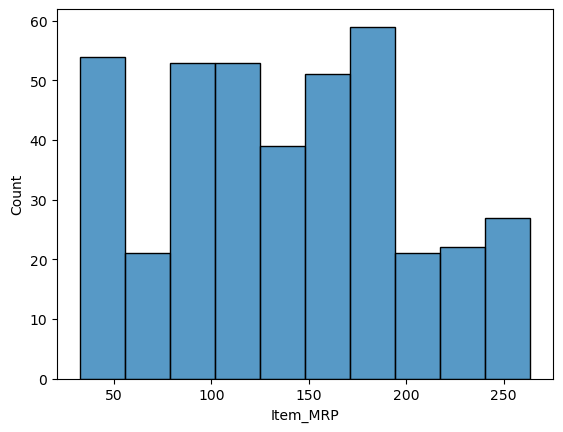

In [120]:
sns.histplot(X_shap_local['Item_MRP'])
idx_mrp=X_shap_local['Item_MRP'].agg(['median'])
idx_mrp

In [121]:
filter_cheap = X_shap_local['Item_MRP']< 139.2496
filter_cheap.value_counts()

False    201
True     199
Name: Item_MRP, dtype: int64

#### Item_Weight Filter

median    12.822634
Name: Item_Weight, dtype: float64

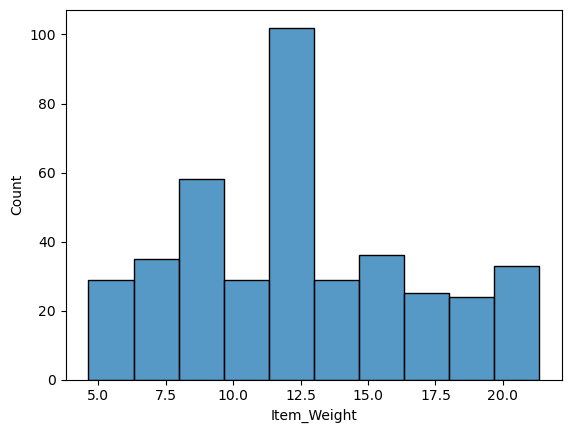

In [122]:
sns.histplot(X_shap_local['Item_Weight'])
X_shap_local['Item_Weight'].agg(['median'])

In [123]:
filter_heavy = X_shap_local['Item_Weight']> 12.82
filter_heavy.value_counts()

True     222
False    178
Name: Item_Weight, dtype: int64

#### Item_Visibility Filter

median    0.055029
Name: Item_Visibility, dtype: float64

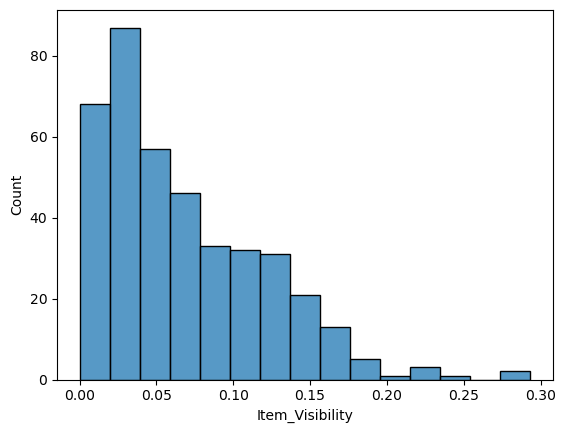

In [124]:
sns.histplot(X_shap_local['Item_Visibility'])
X_shap_local['Item_Visibility'].agg(['median'])

In [125]:
filter_less_visible=X_shap_local['Item_Visibility']< 0.05
filter_less_visible

0      False
1       True
2      False
3      False
4      False
       ...  
395    False
396     True
397     True
398    False
399     True
Name: Item_Visibility, Length: 400, dtype: bool

# Examples

## Example One will be an cheap, heavier, less visible Item 

In [126]:
# Instantiate group_1
group_1 = X_shap_local[filter_cheap&filter_heavy&filter_less_visible].index
group_1

Int64Index([  8,  22,  30,  43,  46,  51,  61,  77,  95,  96,  97, 105, 122,
            123, 127, 142, 159, 171, 178, 183, 187, 196, 218, 227, 253, 258,
            262, 267, 268, 276, 277, 283, 284, 294, 297, 301, 306, 307, 314,
            315, 316, 319, 331, 338, 342, 343, 346, 369, 378, 383, 394, 396],
           dtype='int64')

In [127]:
# Instantiate example 1
group_1_select = np.random.choice(group_1)
example_group_1 = X_shap_local.loc[group_1_select]
example_group_1.head(5)

Item_Weight                  18.850000
Item_Visibility               0.016105
Item_MRP                    130.262600
Item_Fat_Content_Low Fat      1.000000
Item_Type_Baking Goods        0.000000
Name: 183, dtype: float64

In [128]:
# Confirm the correct group
group_1_select

183

In [139]:
#View selected row
row = 183
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 183
- Target: 2360


Item_Weight                         18.85
Item_Visibility                      0.02
Item_MRP                           130.26
Item_Fat_Content_Low Fat             1.00
Item_Type_Baking Goods               0.00
Item_Type_Breads                     0.00
Item_Type_Breakfast                  0.00
Item_Type_Canned                     0.00
Item_Type_Dairy                      0.00
Item_Type_Frozen Foods               0.00
Item_Type_Fruits and Vegetables      0.00
Item_Type_Hard Drinks                0.00
Item_Type_Health and Hygiene         1.00
Item_Type_Household                  0.00
Item_Type_Meat                       0.00
Item_Type_Seafood                    0.00
Item_Type_Snack Foods                0.00
Item_Type_Soft Drinks                0.00
Item_Type_Starchy Foods              0.00
Outlet_Size_High                     0.00
Outlet_Size_Medium                   0.00
Outlet_Size_Small                    1.00
Name: 183, dtype: float64

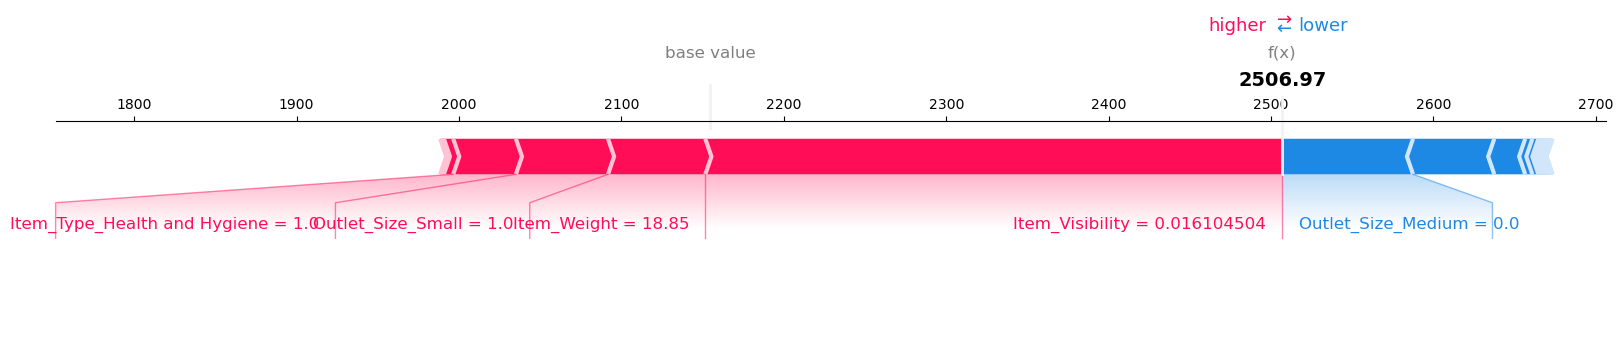

In [140]:
#Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row], matplotlib = True)

### Here we can see the force plot demonstrates that item visibility, as well as being a smaller but heavier health and hygeine product seems to increase it's predicted value

### The fact it isn't sold at a medium outlet is our largest negative contributor 

In [141]:
# Instantiate lime explainer
lime_explainer =LimeTabularExplainer(training_data=X_shap_local.values, feature_names=X_shap_local.columns, mode='regression')
lime_explainer

In [142]:
# lime tabular explainer group 1
exp = lime_explainer.explain_instance(X_shap_local.iloc[row],
                                rf_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


### The lime explaination shows a lot of the same featuring our Item_MRP, and missing outlet_size_medium, overwhelmingly giving negative contributions to predicted value, however the additional fact that it isn't sold as a Breakfast type seems to impact the predicted value notably.

## Example Two will be a(n) expensive, lightweight, more visible Item

In [133]:
# Instantiate group_2
group_2=X_shap_local[~filter_cheap&~filter_heavy&~filter_less_visible].index
group_2

Int64Index([  2,  14,  16,  23,  29,  32,  37,  67,  85,  88,  99, 101, 103,
            107, 116, 117, 134, 139, 150, 156, 160, 167, 182, 185, 189, 191,
            195, 199, 214, 221, 248, 252, 257, 272, 279, 280, 287, 291, 308,
            313, 318, 324, 347, 364, 379, 384, 386, 390],
           dtype='int64')

In [134]:
# Instantiate Example 2
group_2_select=np.random.choice(group_2)
example_group_2=X_shap_local.loc[group_2_select]
example_group_2.head(5)

Item_Weight                   7.810000
Item_Visibility               0.067837
Item_MRP                    246.148600
Item_Fat_Content_Low Fat      1.000000
Item_Type_Baking Goods        0.000000
Name: 195, dtype: float64

In [135]:
# confirm the correct group
group_2_select

195

In [143]:
#View selected row
row = 195
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 195
- Target: 5375


Item_Weight                          7.81
Item_Visibility                      0.07
Item_MRP                           246.15
Item_Fat_Content_Low Fat             1.00
Item_Type_Baking Goods               0.00
Item_Type_Breads                     0.00
Item_Type_Breakfast                  0.00
Item_Type_Canned                     0.00
Item_Type_Dairy                      0.00
Item_Type_Frozen Foods               0.00
Item_Type_Fruits and Vegetables      0.00
Item_Type_Hard Drinks                0.00
Item_Type_Health and Hygiene         0.00
Item_Type_Household                  0.00
Item_Type_Meat                       0.00
Item_Type_Seafood                    0.00
Item_Type_Snack Foods                0.00
Item_Type_Soft Drinks                1.00
Item_Type_Starchy Foods              0.00
Outlet_Size_High                     0.00
Outlet_Size_Medium                   0.00
Outlet_Size_Small                    0.00
Name: 195, dtype: float64

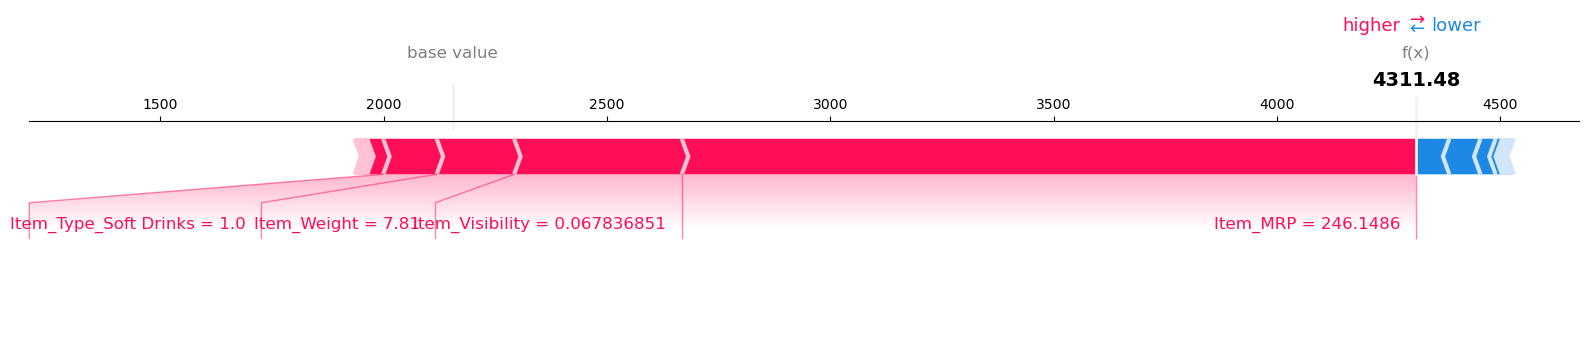

In [144]:
#Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row], matplotlib = True)

### Our higher filter point worked! This force plot shows largely postive contributing factors across the board, making it more lightweight and working on the increase in the display of the item have also shown to influence the item having a higher value.

In [145]:
## lime tabular explainer fro group 2
exp = lime_explainer.explain_instance(X_shap_local.iloc[row],
                                rf_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


### Our lime explainer displays a very strong positive performance from the MRP increase, however the largest contributor to projected losses in value for this item is the fact that it is not sold in medium outlets.

### Even with all of the negative contributions the item MRP is able to outweigh and drive overall positive influence the predicted value of the item.